In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#Ouvrons le fichier Json 
df_json = []

with open('tweet-json.txt') as f:
    for line in f:
        df_json.append(json.loads(line))

#Lecture du fichier Json et creation de la dataframe
tweet_data = pd.DataFrame(df_json , columns = ['id' , 'retweet_count' , 'favorite_count'])



In [39]:
# creation et recuperation du fichier image-predictions.tsv dans un dossier qu'on va apeller  image_predictions_file
import os

import requests as rt
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = rt.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

# Evaluons les données

In [9]:
#1- Évaluons 'twitter-archive-data'
twitter_archive_enhanced= pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive_enhanced.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [12]:
twitter_archive_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Nugget       1
Eriq         1
Ralf         1
Tedders      1
Scott        1
Name: name, Length: 957, dtype: int64

In [14]:
twitter_archive_enhanced.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/739979191639244800/photo/1                                                                                                                                                                                                                                              2
http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1    2
https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1                                                                                                                                                                                             2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                            

In [15]:
type(twitter_archive_enhanced.timestamp[0])

str

In [16]:
twitter_archive_enhanced.duplicated().sum()

0

In [17]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [40]:
#2 - image-predictions
image_predictions = pd.read_csv('image_predictions_file/image-predictions.tsv',sep='\t')

In [42]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,cocker_spaniel,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
1668,813051746834595840,https://pbs.twimg.com/media/C0iKPZIXUAAbDYV.jpg,1,golden_retriever,0.914804,True,Labrador_retriever,0.083550,True,kuvasz,0.000453,True
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True


In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
type(image_predictions.jpg_url[0])

str

In [45]:
image_predictions.duplicated().sum()

0

In [46]:
#3 Assess_tweet-data

tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [47]:
tweet_data.sample(10)

,id,retweet_count,favorite_count
1498,692158366030913536,896,2369
903,758099635764359168,11550,21302
333,832682457690300417,3368,13017
887,759793422261743616,2173,6620
1075,739544079319588864,24319,43694
1836,675898130735476737,653,1774
717,783466772167098368,2608,9468
2351,666033412701032449,47,128
721,783085703974514689,2565,9112
1429,697516214579523584,1282,2281


In [48]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [49]:
tweet_data.duplicated().sum()

0

# Problème de Qualité

-------  18 erreurs detectées  --------


A- twitter_archive_enhanced

- tweet_id doit être "string" et non "int"
- certaines valeurs dans la colonne rating_denominator ne sont pas "10"
- certaines valeurs dans la colonne rating_numerator sont inférieures à "10"
- certaines valeurs dans la colonne rating_numerator = zéro
- timestamp doit être "data time" et non "str"
- retweeted_status_id doit être supprimé car nous nous intéressons au tweet
- retweeted_status_user_id doit être supprimé car nous nous intéressons au tweet
- retweeted_status_timestamp doit être supprimé car nous nous intéressons au tweet
- Valeurs nulles représentées par (aucun) dans la colonne de nom
- certaines des lignes expand_urls ont 2 URL et nous avons juste besoin d'un lien tweeter
- 59 valeur manquante dans la colonne expand_urls
- certaines valeurs dans la colonne rating_numerator sur ratated
- noms étranges comme ('a' , 'an') dans la colonne de nom


B- images-prédictions

- tweet_id doit être "string" et non "int"
- Les noms dans les p colonnes commencent souvent par des lettres majuscule et souvent par des  lettre minuscule


C- tweet_data

- le nom de la colonne id doit être "tweet_id" au lieu de "id"
- tweet_id doit être "string" et non "int"

# Problème de Rangement

-------  3 erreurs detectées  --------

A- twitter_archive_enhanced

   - doggo, floofer, pupper et puppo doivent être dans une colonne et non 4

B- images-prédictions

   - dans les colonnes "confg" devrait être la configuration

C- tweet_data

   - aucun problème

Pour A, B et C

- ce serai plus judicieux de combiner les trois dataframes en un seul dataframe

# Copie des données avant traitement

In [50]:
clean_twitter_archive = twitter_archive_enhanced.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()

#  Netoyons les données

In [51]:
# Qualité :remplacer la colonne de nom de "id" par "tweet_id"

clean_tweet_data.rename(columns={'id': 'tweet_id'}, inplace=True)

#test
clean_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [52]:
#rangement : combiner les trois dataframes en un seul dataframe

clean_twitter_archive = pd.merge(clean_twitter_archive , image_predictions , on= "tweet_id" , how="left") 
clean_twitter_archive = pd.merge(clean_twitter_archive , clean_tweet_data , on= "tweet_id" , how="left")

In [53]:
#test

clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,111.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147.0,311.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47.0,128.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48.0,132.0


In [54]:
#Qualité : tweet_id doit être "string" et non "int"
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype(str)

In [55]:
#test
type(clean_twitter_archive['tweet_id'][0])

str

In [56]:
#rangement : doggo, floofer, pupper, and puppo doivent etre dans une seul colonne en extrayant le statut du chien dans le texte, l'enregistrer dans une nouvelle colonne et en supprimer les autres colonnes

clean_twitter_archive['Dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'])

In [57]:
#test

clean_twitter_archive['Dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_stage, dtype: int64

In [58]:
# Qualité : certaines valeurs dans la colonne rating_denominator ne sont pas "10" on va donc remplacer les valeurs de tout nombre inférieur à 10 à 10

clean_twitter_archive.rating_denominator = clean_twitter_archive.rating_denominator.replace( range(0,1000) , 10 )  

#test

clean_twitter_archive.rating_denominator.value_counts()


10    2356
Name: rating_denominator, dtype: int64

In [59]:
#Qualité : certaines valeurs dans la colonne rating_numerator sont inférieures à "10"
#Qualité : certaines valeurs dans la colonne rating_numerator = zéro
#Nous allons ajouter 10 pour corriger ces valeurs

clean_twitter_archive.rating_numerator[clean_twitter_archive['rating_numerator'] <= 10 ] = clean_twitter_archive.rating_numerator[clean_twitter_archive['rating_numerator'] <= 10 ].add(10)

<ipython-input-59-489d6bfb631a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive.rating_numerator[clean_twitter_archive['rating_numerator'] <= 10 ] = clean_twitter_archive.rating_numerator[clean_twitter_archive['rating_numerator'] <= 10 ].add(10)


In [60]:
#test

clean_twitter_archive.rating_numerator.value_counts()

12      567
11      473
20      462
13      370
19      158
18      102
14       71
17       56
15       39
16       32
420       2
10        2
75        2
84        1
24        1
26        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [61]:
clean_twitter_archive.query('rating_numerator <= 10 ').rating_numerator.sum()

20

In [62]:
#Qualité : timestamp doit être "data time" et non "str"
#Nous allons convertir le type de colonne en utilisant la méthode to_datetime

clean_twitter_archive['timestamp']= pd.to_datetime(clean_twitter_archive['timestamp'])



In [63]:
#test
type(clean_twitter_archive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [64]:
#Qualité :

#retweeted_status_id doit être supprimé
#retweeted_status_user_id doit être supprimé
#retweeted_status_timestamp doit être supprimé
#Nous allons supprimé ces colonnes grace à la methode drop

clean_twitter_archive = clean_twitter_archive.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'])

In [65]:
#test

clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2356 non-null   datetime64[ns, UTC]
 4   source                 2356 non-null   object             
 5   text                   2356 non-null   object             
 6   expanded_urls          2297 non-null   object             
 7   rating_numerator       2356 non-null   int64              
 8   rating_denominator     2356 non-null   int64              
 9   name                   2356 non-null   object             
 10  jpg_url                2075 non-null   object             
 11  img_num                2075 non-null   float64          

In [ ]:
#Qualité : Nan représentés par (None) dans la colonne de nom
#nous allons remplacez ces valeurs par des valeurs nulles en utilisant la méthode de remplacement et la méthode numpy nan

In [66]:
clean_twitter_archive.name = twitter_archive_enhanced.name.replace("None", value = np.nan )

In [67]:
#test

clean_twitter_archive.name.isnull().sum()

745

In [68]:
#Qualité : les noms p colonnes ont une lettre majuscule et une lettre minuscule
#utiliser des lettres majuscules avec la méthode du titre

clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

In [69]:
#test

clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN


# Stockons des données

In [70]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index=False)

# Analyse et Visualisation des données

In [71]:
clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,15,10,NaN,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,111.0,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,16,10,a,...,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,147.0,311.0,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,19,10,a,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,47.0,128.0,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,17,10,a,...,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,48.0,132.0,NaN


## Rapport Dog_stage

<BarContainer object of 4 artists>

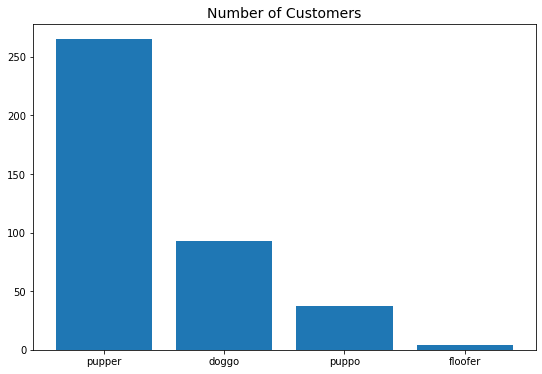

In [73]:
plt.figure(figsize=(9,6))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['Dog_stage'].value_counts().index,
        height=clean_twitter_archive.Dog_stage.value_counts().values)

### conclusions

- Pupper est l'étape la plus populaire
- floofer est la scène la moins populaire

# # Etudions Le taux de réussite des algorithmes

In [74]:
clean_twitter_archive['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [75]:
sucsses_p1 = (1532/(1532+543))*100
sucsses_p1

73.83132530120481

<BarContainer object of 2 artists>

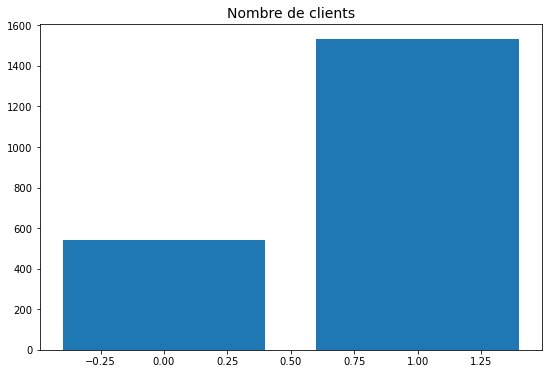

In [76]:
plt.figure(figsize=(9,6))
plt.title("Nombre de clients", fontsize=14)
plt.bar(x=clean_twitter_archive['p1_dog'].value_counts().index,
        height=clean_twitter_archive.p1_dog.value_counts().values)

In [77]:
clean_twitter_archive['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [78]:
somme= (1553+522)
sucsses_p2 = (1553/somme)*100
sucsses_p2

74.8433734939759

<BarContainer object of 2 artists>

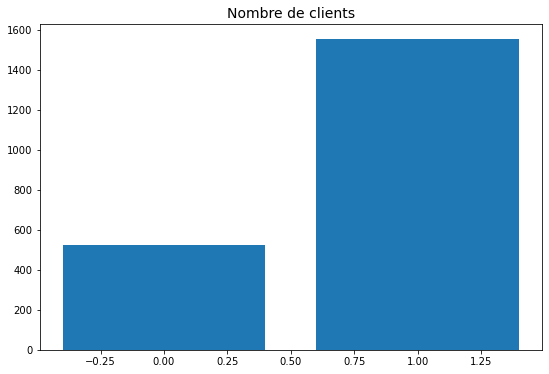

In [80]:
plt.figure(figsize=(9,6))
plt.title("Nombre de clients", fontsize=14)
plt.bar(x=clean_twitter_archive['p2_dog'].value_counts().index,
        height=clean_twitter_archive.p2_dog.value_counts().values)



In [81]:
clean_twitter_archive['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [82]:
somme= (1499+576)
sucsses_p3 = (1499/somme)*100
sucsses_p3

72.2409638554217

<BarContainer object of 2 artists>

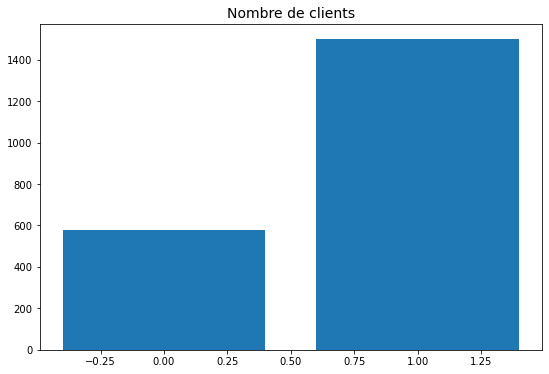

In [83]:
plt.figure(figsize=(9,6))
plt.title("Nombre de clients", fontsize=14)
plt.bar(x=clean_twitter_archive['p3_dog'].value_counts().index,
        height=clean_twitter_archive.p3_dog.value_counts().values)

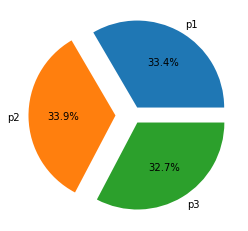

In [84]:
plt.pie([sucsses_p1,sucsses_p2,sucsses_p3],labels=('p1','p2','p3'), explode = [0.1,0.2,0.1],autopct ='%1.1f%%')
plt.show()

### Conclusion

- p2_algorithm est l'algorithme le plus réussi
- p3_algorithm est l'algorithme le moins réussi